# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [16]:
# import package
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np


# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [116]:
# setting each station name and their url
#南港
NG='https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68'
#台北
TP='https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490'
#板橋
BC='https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490'
#桃園
TY='https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd'
#新竹
SJ='https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4'
#苗栗
ML='https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3'
#台中
TJ='https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779'
#彰化
JH='https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e'
#雲林
YL='https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f'
#嘉義
JY='https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7'
#台南
TN='https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814'
#左營
JE='https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356'

In [59]:
# crawler the address of each station
def address(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    news = soup.find('div', class_='col-md-4')
    events = news.find("td")
    events = events.find(class_="google-map-link orange")
    return events.text
address(BC)

'台北市北平西路3號'

In [86]:
# crawler the operation hours and ticketing hours of each station
def operation(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    news = soup.find('div', class_='col-md-4')
    events = news.find("td",class_="gray")
    return events.text
print(operation(BC))
def ticketing(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text)
    news = soup.find('div', class_='col-md-4')
    events = news.find_all("td",class_="gray")
    return events[1].text
ticketing(BC)

營業時間：06:00 ~ 24:00


'售票時間：06:00 ~ 末班車發車時間'

In [118]:
# create a DataFrame
List=[NG,TP,BC,TY,SJ,ML,TJ,JH,YL,JY,TN,JE]
Data={'station':['南港','台北','板橋','桃園','新竹','苗栗','台中','彰化','雲林','嘉義','台南','左營'], 'address':[], 'operation_hours':[], 'ticketing_hours':[]}
for url in List:
    Data['address'].append(address(url))
    Data['operation_hours'].append(operation(url))
    Data['ticketing_hours'].append(ticketing(url))
pd.DataFrame(Data)

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,營業時間：05:50 ~ 24:00,售票時間：05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,營業時間：06:00 ~ 24:00,售票時間：06:00 ~ 末班車發車時間
2,板橋,台北市北平西路3號,營業時間：06:00 ~ 24:00,售票時間：06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,營業時間：06:20 ~ 23:45,售票時間：06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,營業時間：06:15 ~ 23:45,售票時間：06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,營業時間：06:05 ~ 23:45,售票時間：06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,營業時間：05:40 ~ 24:00,售票時間：05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,營業時間：06:20 ~ 24:00,售票時間：06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,營業時間：06:15 ~ 23:45,售票時間：06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,營業時間：06:00 ~ 23:45,售票時間：06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [7]:
# crawler GDP
def GDPdata(num):
    response = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)')
    soup = BeautifulSoup(response.text, 'html.parser')
    news = soup.find('div', class_='mw-parser-output')
    events = news.find_all("tr")
    return events[num+5].text.split('\n')
GDPdata(0)

['',
 '\xa0United States',
 'Americas',
 '22,675,271',
 '2021',
 '21,433,226',
 '2019',
 '20,936,600',
 '2020',
 '']

In [8]:
# create GDP DataFrame
GDP = {'Country':[], 'Region':[], 'IMF_Estimate':[], 'IMF_Year':[], 'United_Nations_Estimate':[], 'United_Nations_Year':[], 'World_Bank_Estimate':[], 'World_Bank_Year':[]}
for i in range (0,50):
    GDP['Country'].append(GDPdata(i)[1].strip('\xa0'))
    GDP['Region'].append(GDPdata(i)[2])
    GDP['IMF_Estimate'].append(GDPdata(i)[3])
    GDP['IMF_Year'].append(GDPdata(i)[4])
    GDP['United_Nations_Estimate'].append(GDPdata(i)[5])
    GDP['United_Nations_Year'].append(GDPdata(i)[6])
    GDP['World_Bank_Estimate'].append(GDPdata(i)[7])
    GDP['World_Bank_Year'].append(GDPdata(i)[8])
pd.DataFrame(GDP)

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020
1,China,Asia,"16,642,318",[n 2]2021,"14,342,933",[n 3]2019,"14,722,731",2020
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020


In [9]:
# crawler CPI
def CPIdata(num):
    response = requests.get('https://en.wikipedia.org/wiki/Corruption_Perceptions_Index')
    soup = BeautifulSoup(response.text, 'html.parser')
    news = soup.find('div', class_='mw-parser-output')
    events = news.find_all('tr')
    #events = events.find("flagicon")
    return events[num+23].text.split('\n')

In [10]:
# CPI DataFrame
CPI = {'Country':[], 'CPI_2020':[]}
for i in range (0,100):
    CPI['Country'].append(CPIdata(i)[2].strip('\xa0'))
    CPI['CPI_2020'].append(CPIdata(i)[3])
pd.DataFrame(CPI)

,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
95,Kazakhstan,38
96,Peru,38
97,Serbia,38
98,Sri Lanka,38


In [11]:
# merge GDP and CPI DataFrame
GDPs = {'Country':[], 'Region':[], 'IMF_Estimate':[], 'IMF_Year':[], 'United_Nations_Estimate':[], 'United_Nations_Year':[], 'World_Bank_Estimate':[], 'World_Bank_Year':[], 'CPI_2020':[]}
CPI=pd.DataFrame(CPI)
for i in range (0,10):
    GDPs['Country'].append(GDPdata(i)[1].strip('\xa0'))
    GDPs['Region'].append(GDPdata(i)[2])
    GDPs['IMF_Estimate'].append(GDPdata(i)[3])
    GDPs['IMF_Year'].append(GDPdata(i)[4])
    GDPs['United_Nations_Estimate'].append(GDPdata(i)[5])
    GDPs['United_Nations_Year'].append(GDPdata(i)[6])
    GDPs['World_Bank_Estimate'].append(GDPdata(i)[7].strip(','))
    GDPs['World_Bank_Year'].append(GDPdata(i)[8])
    for j in range(len(CPI)):
        if GDP['Country'][i]==CPI['Country'][j]:
            GDPs['CPI_2020'].append(CPI['CPI_2020'][j])
            break
pd.DataFrame(GDPs)

,Country,Region,IMF_Estimate,IMF_Year,United_Nations_Estimate,United_Nations_Year,World_Bank_Estimate,World_Bank_Year,CPI_2020
0,United States,Americas,"22,675,271",2021,"21,433,226",2019,"20,936,600",2020,67
1,China,Asia,"16,642,318",[n 2]2021,"14,342,933",[n 3]2019,"14,722,731",2020,42
2,Japan,Asia,"5,378,136",2021,"5,082,465",2019,"4,975,415",2020,74
3,Germany,Europe,"4,319,286",2021,"3,861,123",2019,"3,806,060",2020,80
4,United Kingdom,Europe,"3,124,650",2021,"2,826,441",2019,"2,707,744",2020,77
5,India,Asia,"3,049,704",2021,"2,891,582",2019,"2,622,984",2020,40
6,France,Europe,"2,938,271",2021,"2,715,518",2019,"2,603,004",2020,69
7,Italy,Europe,"2,106,287",2021,"2,003,576",2019,"1,886,445",2020,53
8,Canada,Americas,"1,883,487",2021,"1,741,496",2019,"1,643,408",2020,77
9,South Korea,Asia,"1,806,707",2021,"1,646,539",2019,"1,630,525",2020,61


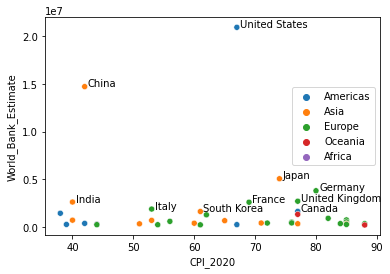

In [16]:
# plot
import matplotlib.pyplot as plt
X=np.array(pd.DataFrame(GDPs)['CPI_2020'])
Y=np.array(pd.DataFrame(GDPs)['World_Bank_Estimate'])
labels=pd.DataFrame(GDPs)['Country']
plt.scatter(X,Y)
plt.legend(labels=pd.DataFrame(GDPs)['Country'], loc='upper left')